# 1. ABOUT DATASET

Rice Image Dataset

DATASET: https://www.muratkoklu.com/datasets/

Citation Request: See the articles for more detailed information on the data.

Koklu, M., Cinar, I., & Taspinar, Y. S. (2021). Classification of rice varieties with deep learning methods. Computers and Electronics in Agriculture, 187, 106285. https://doi.org/10.1016/j.compag.2021.106285

Cinar, I., & Koklu, M. (2021). Determination of Effective and Specific Physical Features of Rice Varieties by Computer Vision In Exterior Quality Inspection. Selcuk Journal of Agriculture and Food Sciences, 35(3), 229-243. https://doi.org/10.15316/SJAFS.2021.252

Cinar, I., & Koklu, M. (2022). Identification of Rice Varieties Using Machine Learning Algorithms. Journal of Agricultural Sciences https://doi.org/10.15832/ankutbd.862482

Cinar, I., & Koklu, M. (2019). Classification of Rice Varieties Using Artificial Intelligence Methods. International Journal of Intelligent Systems and Applications in Engineering, 7(3), 188-194. https://doi.org/10.18201/ijisae.2019355381

DATASET: https://www.muratkoklu.com/datasets/

Highlights
• Arborio, Basmati, Ipsala, Jasmine and Karacadag rice varieties were used.
• The dataset (1) has 75K images including 15K pieces from each rice variety. The dataset (2) has 12 morphological, 4 shape and 90 color features.
• ANN, DNN and CNN models were used to classify rice varieties.
• Classified with an accuracy rate of 100% through the CNN model created.
• The models used achieved successful results in the classification of rice varieties.

Abstract
Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds. In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown in Turkey, were used. A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset. A second dataset with 106 features including 12 morphological, 4 shape and 90 color features obtained from these images was used. 

Models were created by using Artificial Neural Network (ANN) and Deep Neural Network (DNN) algorithms for the feature dataset and by using the Convolutional Neural Network (CNN) algorithm for the image dataset, and classification processes were performed. Statistical results of sensitivity, specificity, prediction, F1 score, accuracy, false positive rate and false negative rate were calculated using the confusion matrix values of the models and the results of each model were given in tables. 

Classification successes from the models were achieved as 99.87% for ANN, 99.95% for DNN and 100% for CNN. With the results, it is seen that the models used in the study in the classification of rice varieties can be applied successfully in this field.

# 2. IMPORTS

In [7]:
#!pip install opencv-python

import tensorflow as tf 
from tensorflow import keras 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import PIL.Image as Image
import cv2
import os
import numpy as np
import pathlib
print(tf. __version__)

2.1.0


# 3. PREPARING DATA

In [8]:
data_dir = "./Rice_Image_Dataset" # Datasets path
#Please download the Rice Image Dataset from https://www.muratkoklu.com/datasets/ or alternatively from #https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Rice_Image_Dataset')

In [26]:
#Source: https://www.kaggle.com/code/danielwarda/rice-classification-99-2-accuracy-moblienet

In [9]:
arborio = list(data_dir.glob('Arborio/*'))[:600]
basmati = list(data_dir.glob('Basmati/*'))[:600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[:600]
karacadag = list(data_dir.glob('Karacadag/*'))[:600]

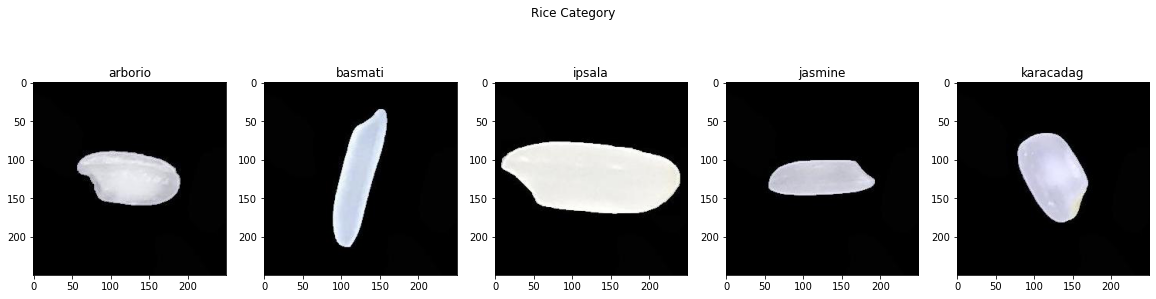

In [10]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

plt.show()

In [11]:
df_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

df_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

In [12]:
img = cv2.imread(str(df_images['arborio'][0])) 
img.shape

(250, 250, 3)

In [13]:
X, y = [], [] 
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) 
        X.append(resized_img) 
        y.append(df_labels[label])

In [14]:
X = np.array(X)
X = X/255
y = np.array(y)

In [15]:
#Spliting into test val train
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

# 4. CREATING MODEL

In [16]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

MobileNet is a simple but efficient and not very computationally intensive convolutional neural networks for mobile vision applications. MobileNet is widely used in many real-world applications which includes object detection, fine-grained classifications, face attributes, and localization. In this lecture, I will explain you the overview of MobileNet and how exactly it becomes the most efficient and lightweight neural network.

Please refer below links for more information about MobileNet:

https://www.youtube.com/watch?v=5JAZiue-fzY & https://deeplizard.com/learn/video/OO4HD-1wRN8

https://medium.com/@godeep48/an-overview-on-mobilenet-an-efficient-mobile-vision-cnn-f301141db94d


* To give a quick comparison in regards to size, the size of the full VGG16 network on disk is about 553 megabytes. 
* The size of one of the currently largest MobileNets is about 17 megabytes, so that is a huge difference, especially when you think about deploying a model to a mobile app or running it in the browser.
* This vast size difference is due to the number of parameters within these networks. For example, VGG16 has 138 million parameters, while the 17 megabyte MobileNet we just mentioned has only 4.2 million.

The source paper for Mobilenet is located here: https://arxiv.org/pdf/1704.04861.pdf

In [27]:
base_model = MobileNet(weights="imagenet", 
                       include_top=False, 
                       input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

In [19]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

**MobileNet model**

What we're going to do is download a MobileNet model, and then use it for inference just on a few random images to see how well it classifies these images according to ImageNet classes.

We first make a call to tf.keras.applications.mobilenet.MobileNet() to obtain a copy of a single pretrained MobileNet with weights that were saved from being trained on ImageNet images. We're assigning this model to the variable mobile.

Next, we have a function called prepare_image() that accepts an image file, and processes the image to get it in a format that the model expects. We'll be passing each of our images to this function before we use MobileNet to predict on it, so let's see what exactly this function is doing.

In [29]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = './Rice_Image_Dataset'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

17227776/17225924 [==============================] - 1s 0us/step


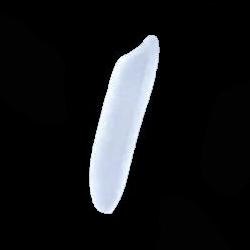

In [37]:
from IPython.display import Image
Image(filename='./Rice_Image_Dataset/Basmati/Basmati (1).jpg')

In [43]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from IPython.display import Image
preprocessed_image = prepare_image('./Rice_Image_Dataset/Basmati/Basmati (1).jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n03658185', 'letter_opener', 0.2853107),
  ('n01924916', 'flatworm', 0.24065813),
  ('n01930112', 'nematode', 0.225997),
  ('n03793489', 'mouse', 0.04218471),
  ('n02951585', 'can_opener', 0.024154855)]]

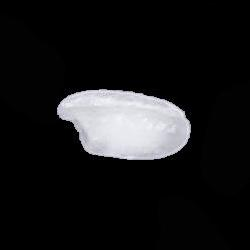

In [46]:
from IPython.display import Image
Image(filename='./Rice_Image_Dataset/Arborio/Arborio (1).jpg')

In [47]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
preprocessed_image = prepare_image('./Rice_Image_Dataset/Arborio/Arborio (1).jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01910747', 'jellyfish', 0.2656761),
  ('n03929660', 'pick', 0.14674394),
  ('n01496331', 'electric_ray', 0.090365805),
  ('n03314780', 'face_powder', 0.036759917),
  ('n07684084', 'French_loaf', 0.033960488)]]

Then, we're using an ImageNet utility function provided by Keras called decode_predictions(). It returns the top five ImageNet class predictions with the ImageNet class ID, the class label, and the probability. 

With this, we'll be able to see the five ImageNet classes with the highest prediction probabilities from our model on this given image. Recall that there are 1000 total ImageNet classes.

results = imagenet_utils.decode_predictions(predictions)

In case of Basmati : Checking out the results, we have letter_opener with 28%, then flatworm at 24%, nematode at 22%, and a couple other types at less than 1%. 

In case of Arborio rice : Checking out the results, we have jellyfish with 26%, then pick at 14%, and a couple other types at less than 1%. 


In the given case, MobileNet is not predicted correctly in classifying images right out of the box. We'll be continuing to work with MobileNet in the next episode where we'll see how we can fine-tune the model and use transfer learning on a new data set.

In [20]:
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(32, activation="relu"))
top_model.add(Dense(10, activation="softmax"))

top_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1605664   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 1,605,994
Trainable params: 1,605,994
Non-trainable params: 0
_________________________________________________________________


In [21]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(top_model)

transfer_model.layers[0].trainable = False
transfer_model.summary()

transfer_model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = transfer_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
sequential (Sequential)      (None, 10)                1605994   
Total params: 4,834,858
Trainable params: 1,605,994
Non-trainable params: 3,228,864
_________________________________________________________________
Train on 2250 samples, validate on 188 samples
Epoch 1/10
2250/2250 [==============================] - 116s 52ms/sample - loss: 2.1443 - acc: 0.3160 - val_loss: 2.2376 - val_acc: 0.2234
Epoch 2/10
2250/2250 [==============================] - 120s 53ms/sample - loss: 2.0596 - acc: 0.4013 - val_loss: 2.0138 - val_acc: 0.4468
Epoch 3/10
2250/2250 [==============================] - 118s 53ms/sample - loss: 1.9395 - acc: 0.5213 - val_loss: 1.9409 - val_acc: 0.5160
Epoch 4/10
2250/2250 [============

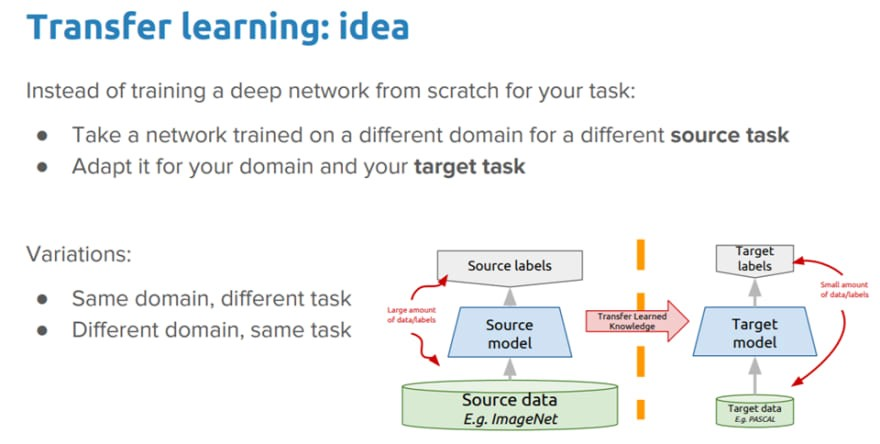

In [28]:
#https://towardsdatascience.com/transfer-learning-using-mobilenet-and-keras-c75daf7ff299

# 5. VISUALIZATION OF THE MODEL

In [22]:
from sklearn.metrics import accuracy_score
y_pred = transfer_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

accuracy_score(y_test, y_pred_bool)

562/562 [==============================] - 7s 13ms/sample


0.5266903914590747

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       124
           1       0.31      1.00      0.47       108
           2       1.00      0.79      0.89       107
           3       0.00      0.00      0.00       116
           4       0.80      0.96      0.88       107

    accuracy                           0.53       562
   macro avg       0.42      0.55      0.45       562
weighted avg       0.40      0.53      0.43       562



C:\Suneel\Anaconda\envs\modelling\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


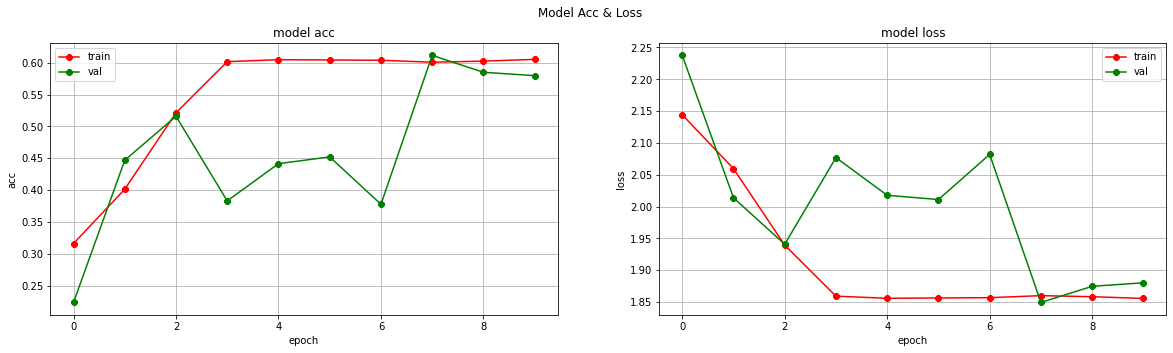

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
fig.suptitle('Model Acc & Loss')


ax[0].set_title('model acc')
ax[1].set_title('model loss')

ax[0].grid()
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('acc')
ax[0].plot(history.history['acc'], marker='8',color='red')
ax[0].plot(history.history['val_acc'], marker='8',color='green')
ax[0].legend(['train', 'val'])

ax[1].grid()
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].plot(history.history['loss'], marker='8',color='red')
ax[1].plot(history.history['val_loss'], marker='8',color='green')
ax[1].legend(['train', 'val'])

plt.show()

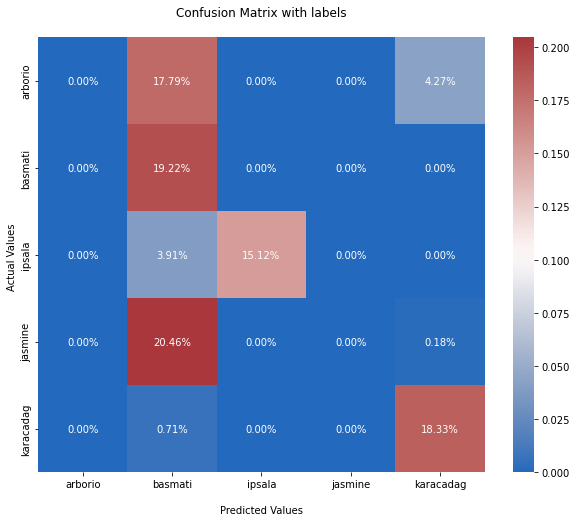

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bool)

plt.figure(figsize=(10,8))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='vlag')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(df_labels)
ax.yaxis.set_ticklabels(df_labels)

plt.show()

# 6. SUMMARY

(1, 10)
2


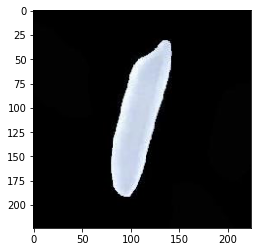

In [57]:
img_path = './Rice_Image_Dataset/Basmati/Basmati (1).jpg'

img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=transfer_model.predict(img[np.newaxis, ...])
print(p.shape)
predicted_class = np.argmax(p[0], axis=-1)
print(predicted_class)

Conclusion: Needs to optimize the model and refer predictions after the model optimization